In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from StockPredictor import Predictor,PredictorEntity
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv("datasets\\BAJAJ-AUTO.NS-FINAL.csv")
df = df[::-1]
predictor_entity = PredictorEntity(
    name="BAJAJ-AUTO",
    epochs=420,
    lr=49,
    activation='relu'
)

machine = Predictor(df,predictor_entity)


In [120]:
machine.compile()
machine.test_predict()

,y_test,y_pred,abs_error,percent_error
0,2840.899902,2829.790283,11.109619,0.391060
1,2863.000000,2858.681152,4.318848,0.150850
2,2887.199951,2876.124023,11.075928,0.383622
3,2808.449951,2790.587646,17.862305,0.636020
4,2724.649902,2733.109131,8.459229,0.310470
...,...,...,...,...
695,3978.750000,3932.730225,46.019775,1.156639
696,3967.649902,3897.712646,69.937256,1.762687
697,3965.899902,3932.309570,33.590332,0.846979
698,3915.949951,3891.965088,23.984863,0.612492


In [121]:
print(machine.metrics())


        "Max Absolute Error":192.8911136249999,
        "Max Percent Error":9.594443525789629,
        "Average Absolute Error":38.779951510513385,
        "Average Percent Error":1.1864250260582458,
        


In [122]:
machine.save_model()

In [123]:
res = machine.res

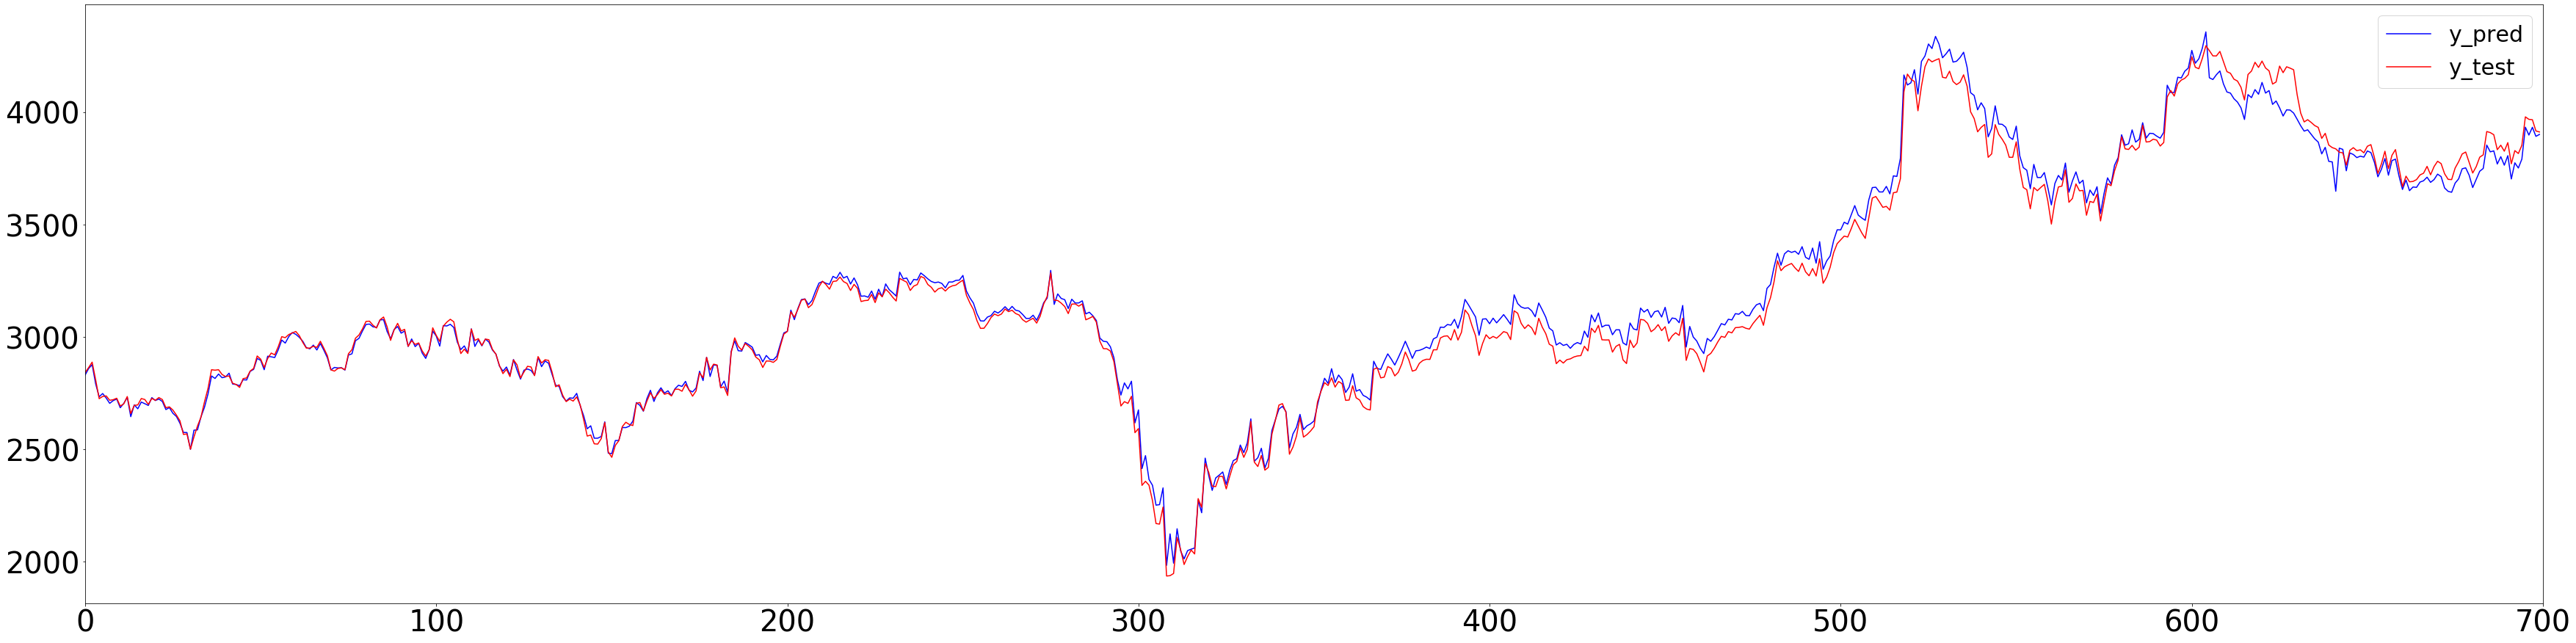

In [124]:
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res['y_pred'],label='y_pred',color='blue')
plt.plot(res['y_test'],label='y_test',color='red')
plt.xlim(xmin=0,xmax=len(res['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

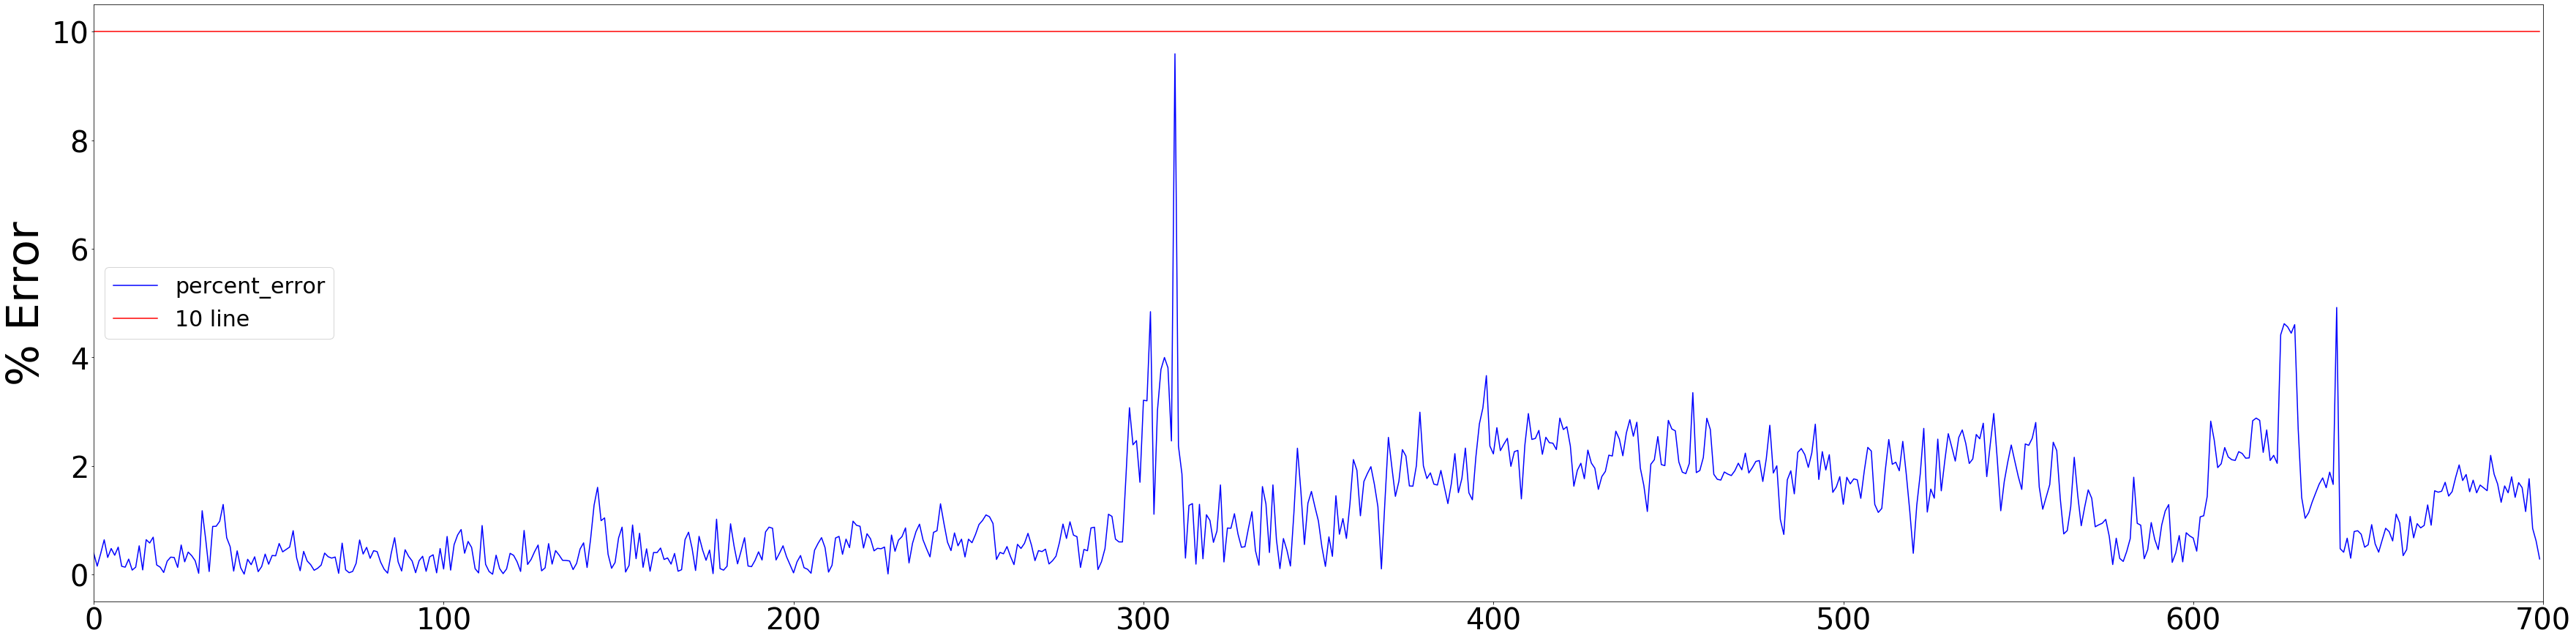

In [125]:
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res['percent_error'],label='percent_error',color='blue')
plt.plot([10 for i in range(len(res['percent_error']))],label='10 line',color='red')
plt.ylabel("% Error")
plt.xlim(xmin=0,xmax=len(res['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

In [126]:
res['adj_pred'] = res['y_pred'] - (res['abs_error'].mean()*199/res['abs_error'].max())
res['adj_abs_error'] = abs(res['y_test'] - res['adj_pred'])
res['adj_percent_error'] = res['adj_abs_error'] * 100 / res['y_test']

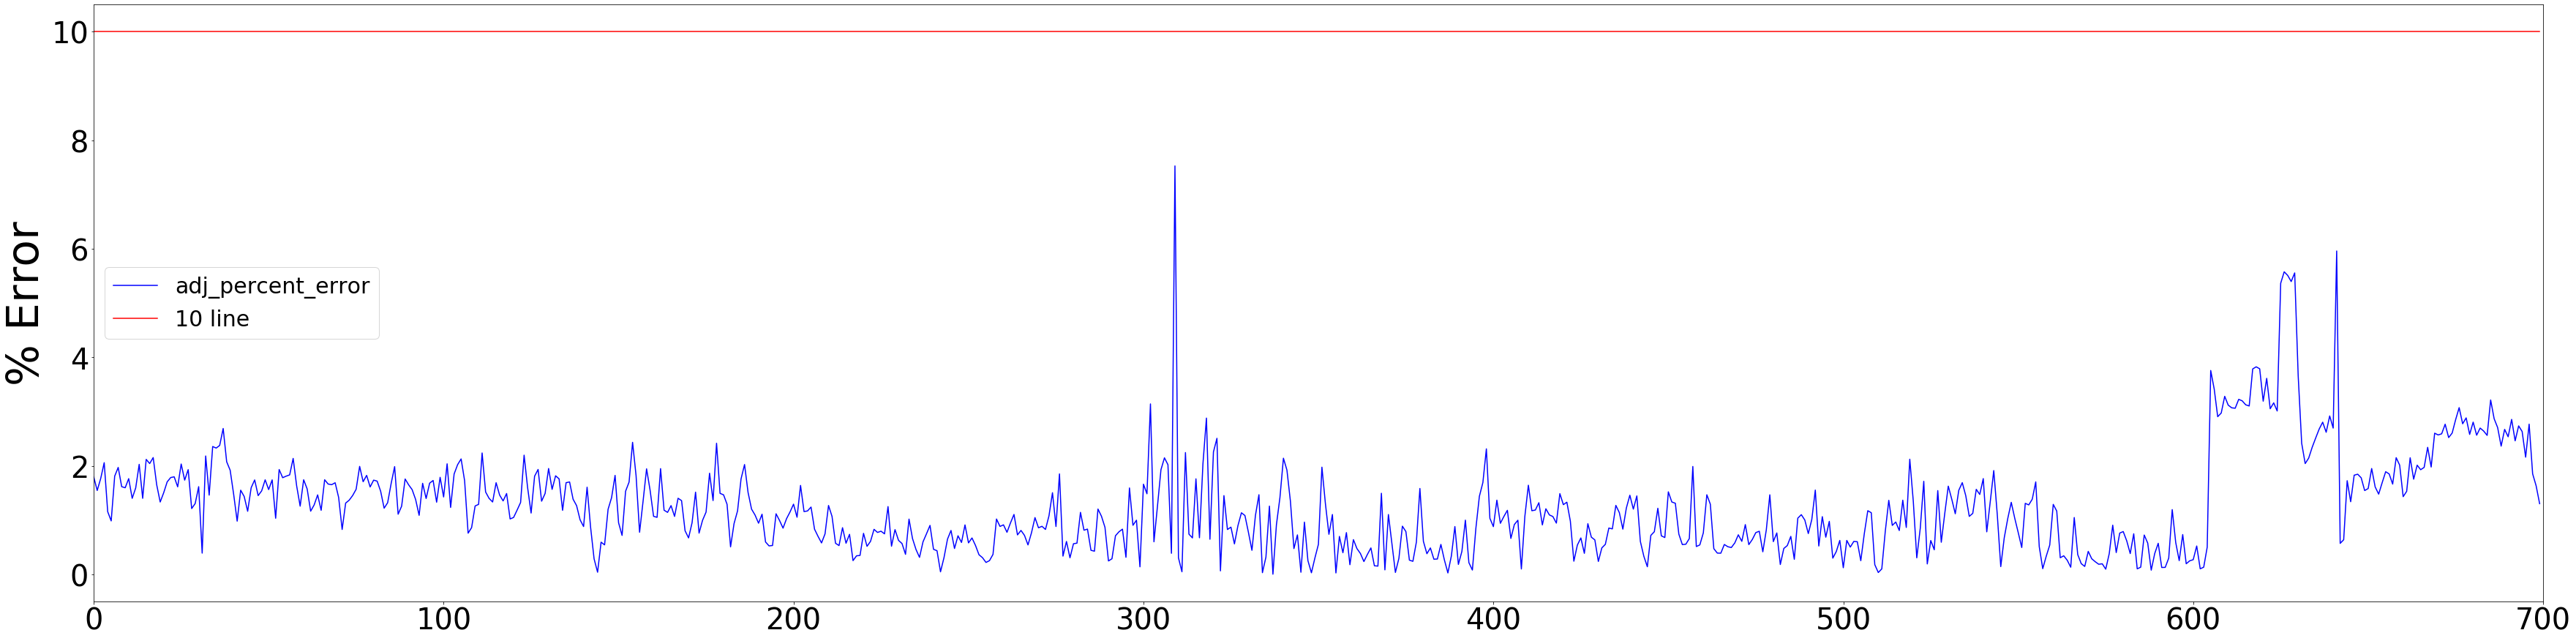

In [127]:
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res['adj_percent_error'],label='adj_percent_error',color='blue')
plt.plot([10 for i in range(len(res['adj_percent_error']))],label='10 line',color='red')
plt.ylabel("% Error")
plt.xlim(xmin=0,xmax=len(res['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

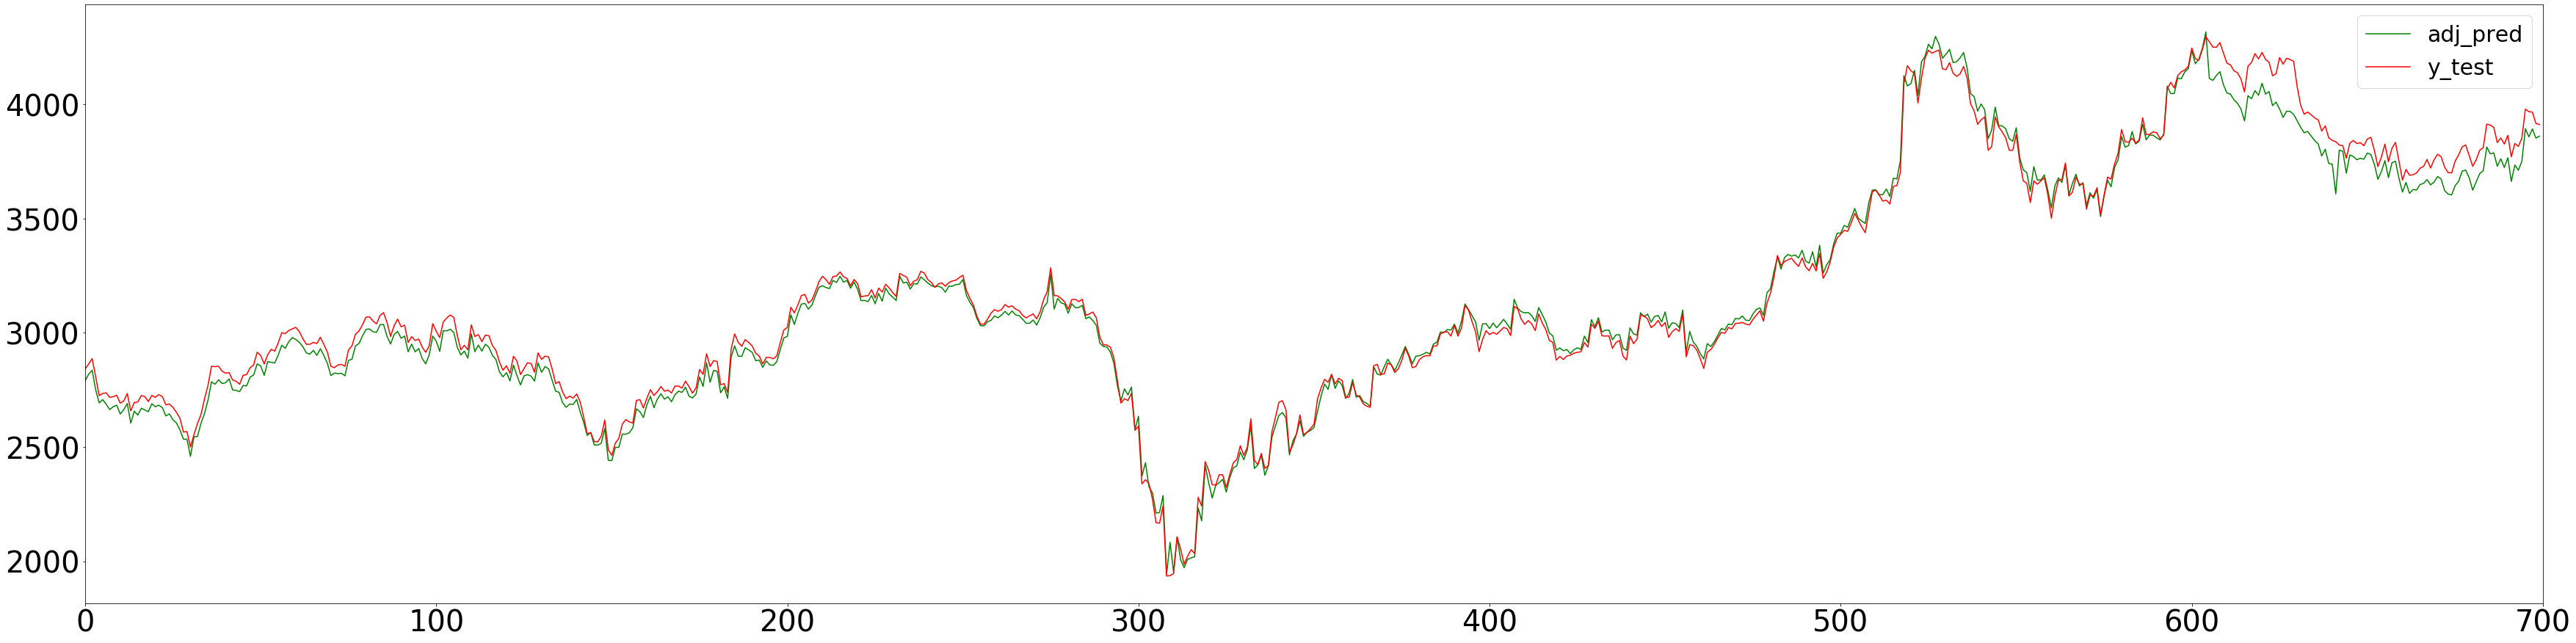

In [128]:
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
#plt.plot(res['y_pred'],label='y_pred',color='blue')
plt.plot(res['adj_pred'],label='adj_pred',color='green')
plt.plot(res['y_test'],label='y_test',color='red')
plt.xlim(xmin=0,xmax=len(res['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

In [129]:
print(res['adj_percent_error'].max())
print(res['adj_percent_error'].mean())

7.5291385083696145
1.2552785880480655


In [130]:
err_max = []
err_mean = []
for i in range(200):
    res['adj_pred'] = res['y_pred'] - (res['abs_error'].mean()*i/res['abs_error'].max())
    res['adj_abs_error'] = abs(res['y_test'] - res['adj_pred'])
    res['adj_percent_error'] = res['adj_abs_error'] * 100 / res['y_test']
    err_max.append(res['adj_percent_error'].max())
    err_mean.append(res['adj_percent_error'].mean())

In [131]:
m = err_max.index(min(err_max))
print(f"{range(200)[m]} : {err_max[m]} : {err_mean[m]}")

199 : 7.5291385083696145 : 1.2552785880480655


# FINAL SCRIPT

In [132]:
from StockPredictor import Predictor,PredictorEntity
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
FILENAME = "1.4398081412555481.h5"
df = pd.read_csv("datasets\\BAJAJ-AUTO.NS-FINAL.csv")
df = df[::-1]
predictor_entity = PredictorEntity(name="BAJAJ-AUTO")
machine = Predictor(df,predictor_entity)
machine.load_model(filepath=f"models\\BAJAJ-AUTO\\{FILENAME}")

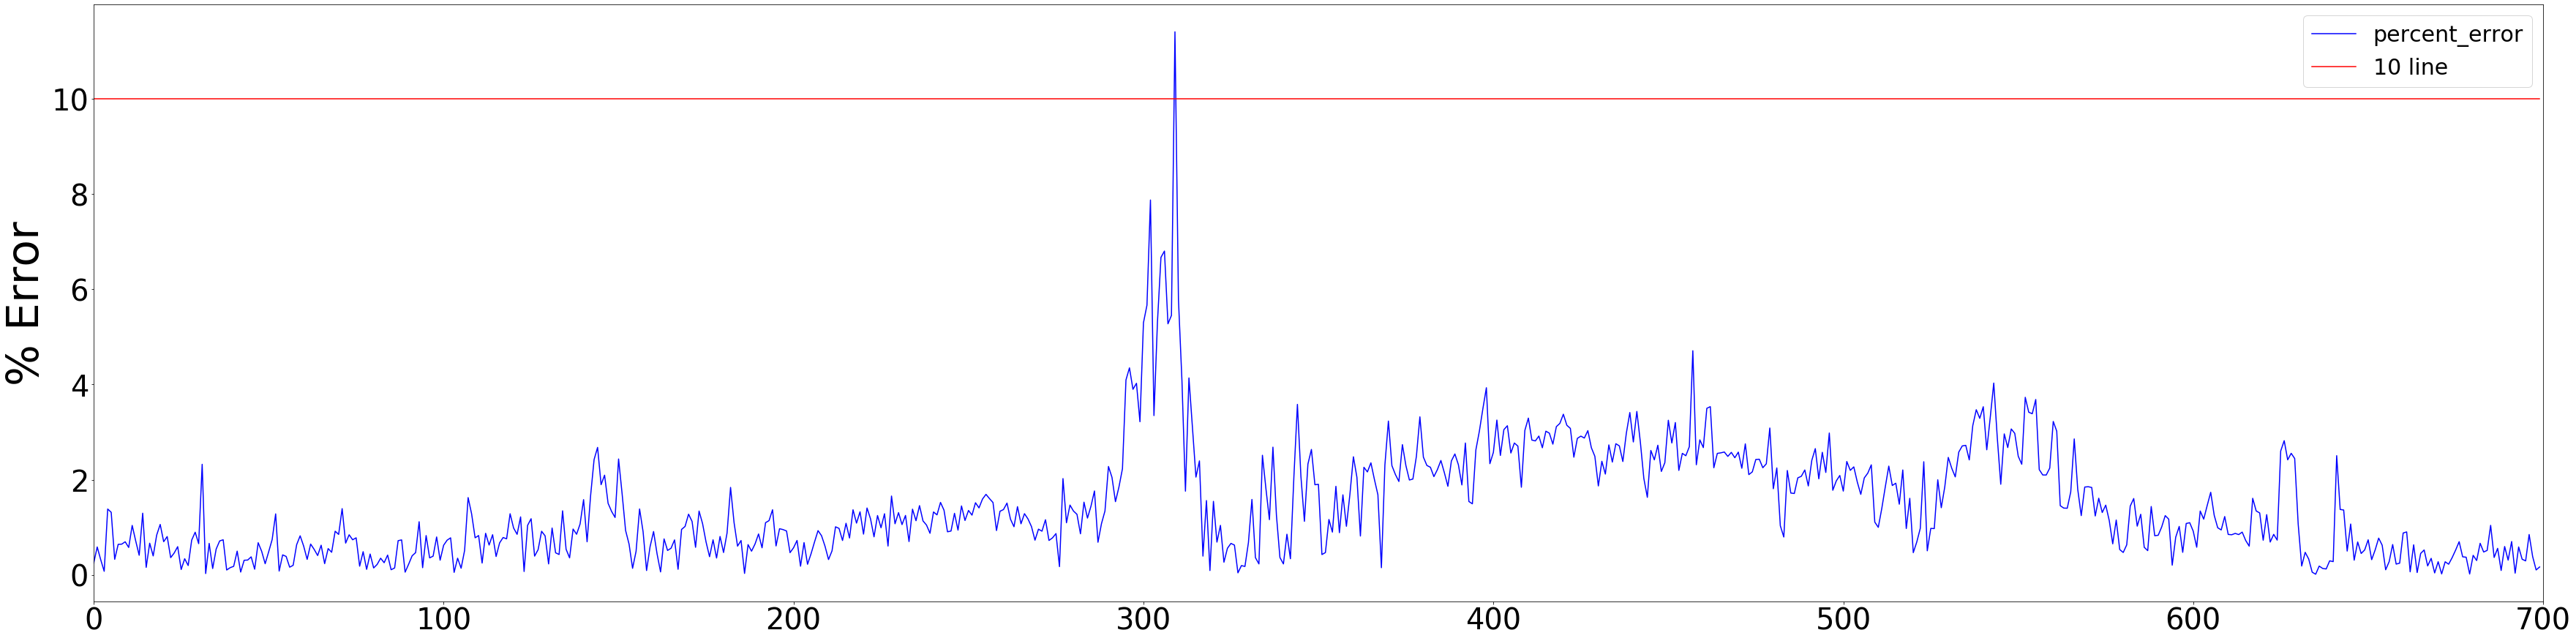

In [134]:
res2 = machine.res
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res2['percent_error'],label='percent_error',color='blue')
plt.plot([10 for i in range(len(res2['percent_error']))],label='10 line',color='red')
plt.ylabel("% Error")
plt.xlim(xmin=0,xmax=len(res2['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

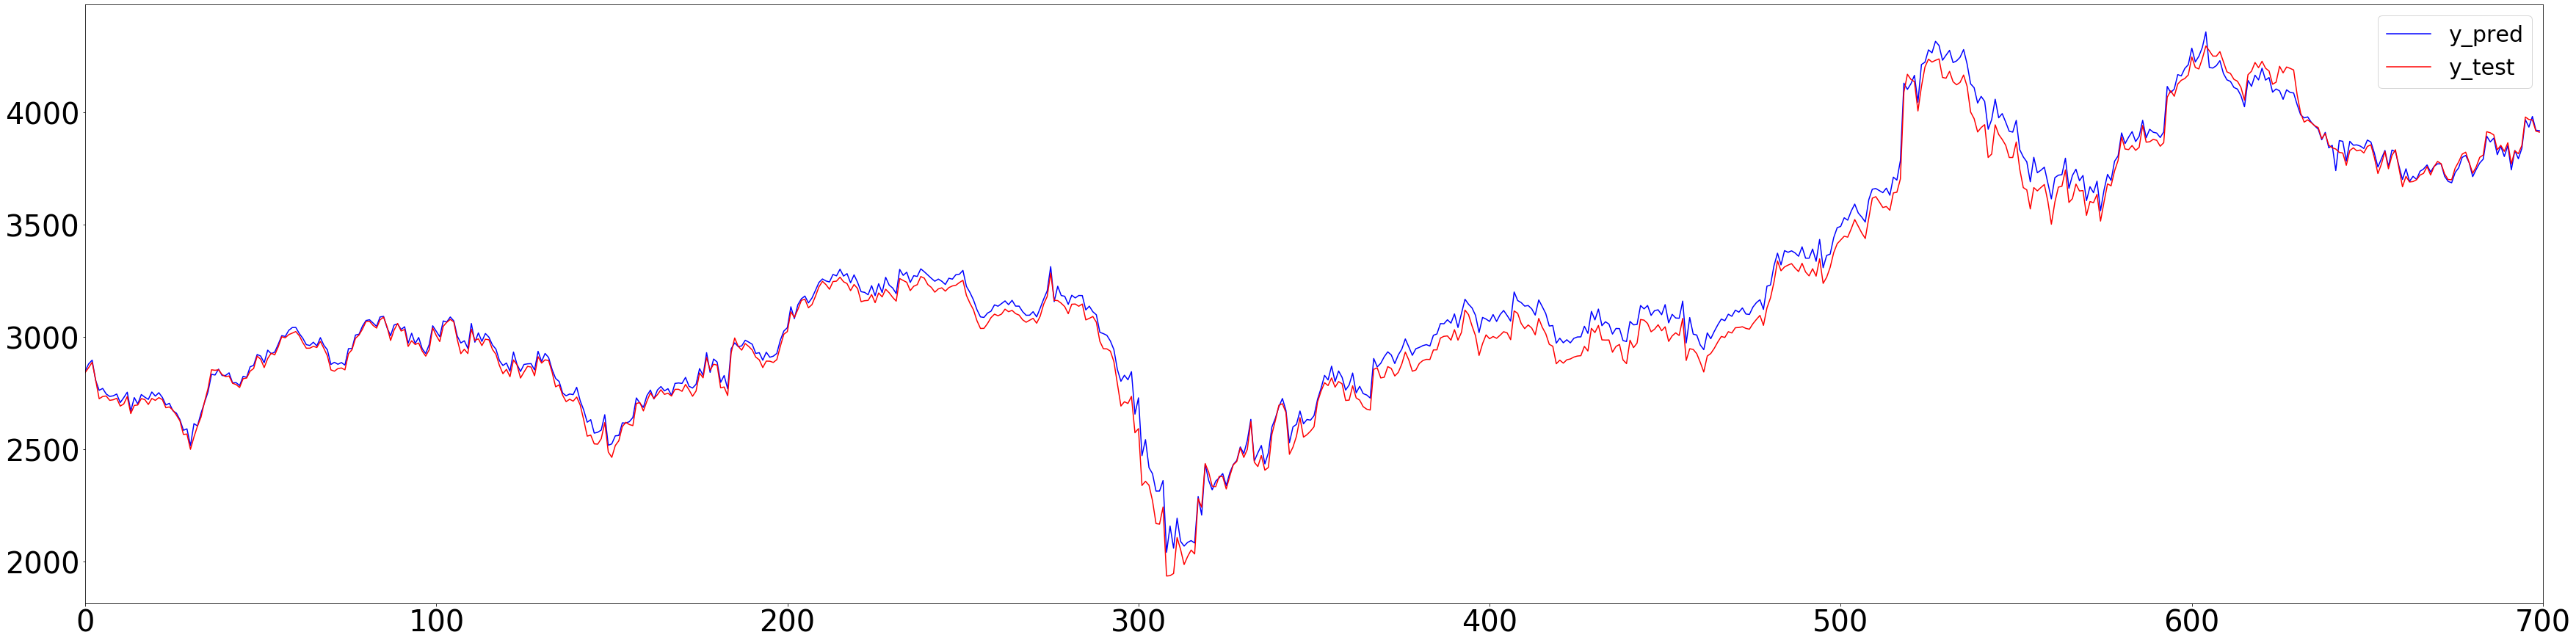

In [135]:
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res2['y_pred'],label='y_pred',color='blue')
plt.plot(res2['y_test'],label='y_test',color='red')
plt.xlim(xmin=0,xmax=len(res2['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

In [136]:
res4 = machine.res.copy()
res4['y_pred'] = res4['y_pred'] - (res4['abs_error'].mean()*199/res4['abs_error'].max())
res4['abs_error'] = abs(res4['y_test'] - res4['y_pred'])
res4['percent_error'] = res4['abs_error'] * 100 / res4['y_test']

In [137]:
res4

,y_test,y_pred,abs_error,percent_error
0,2840.899902,2807.713379,33.186523,1.168169
1,2863.000000,2839.551514,23.448486,0.819018
2,2887.199951,2856.196533,31.003418,1.073823
3,2808.449951,2766.061768,42.388183,1.509309
4,2724.649902,2722.098877,2.551025,0.093628
...,...,...,...,...
695,3978.750000,3926.779541,51.970459,1.306201
696,3967.649902,3893.724609,73.925293,1.863201
697,3965.899902,3941.003906,24.895996,0.627751
698,3915.949951,3879.783203,36.166748,0.923575


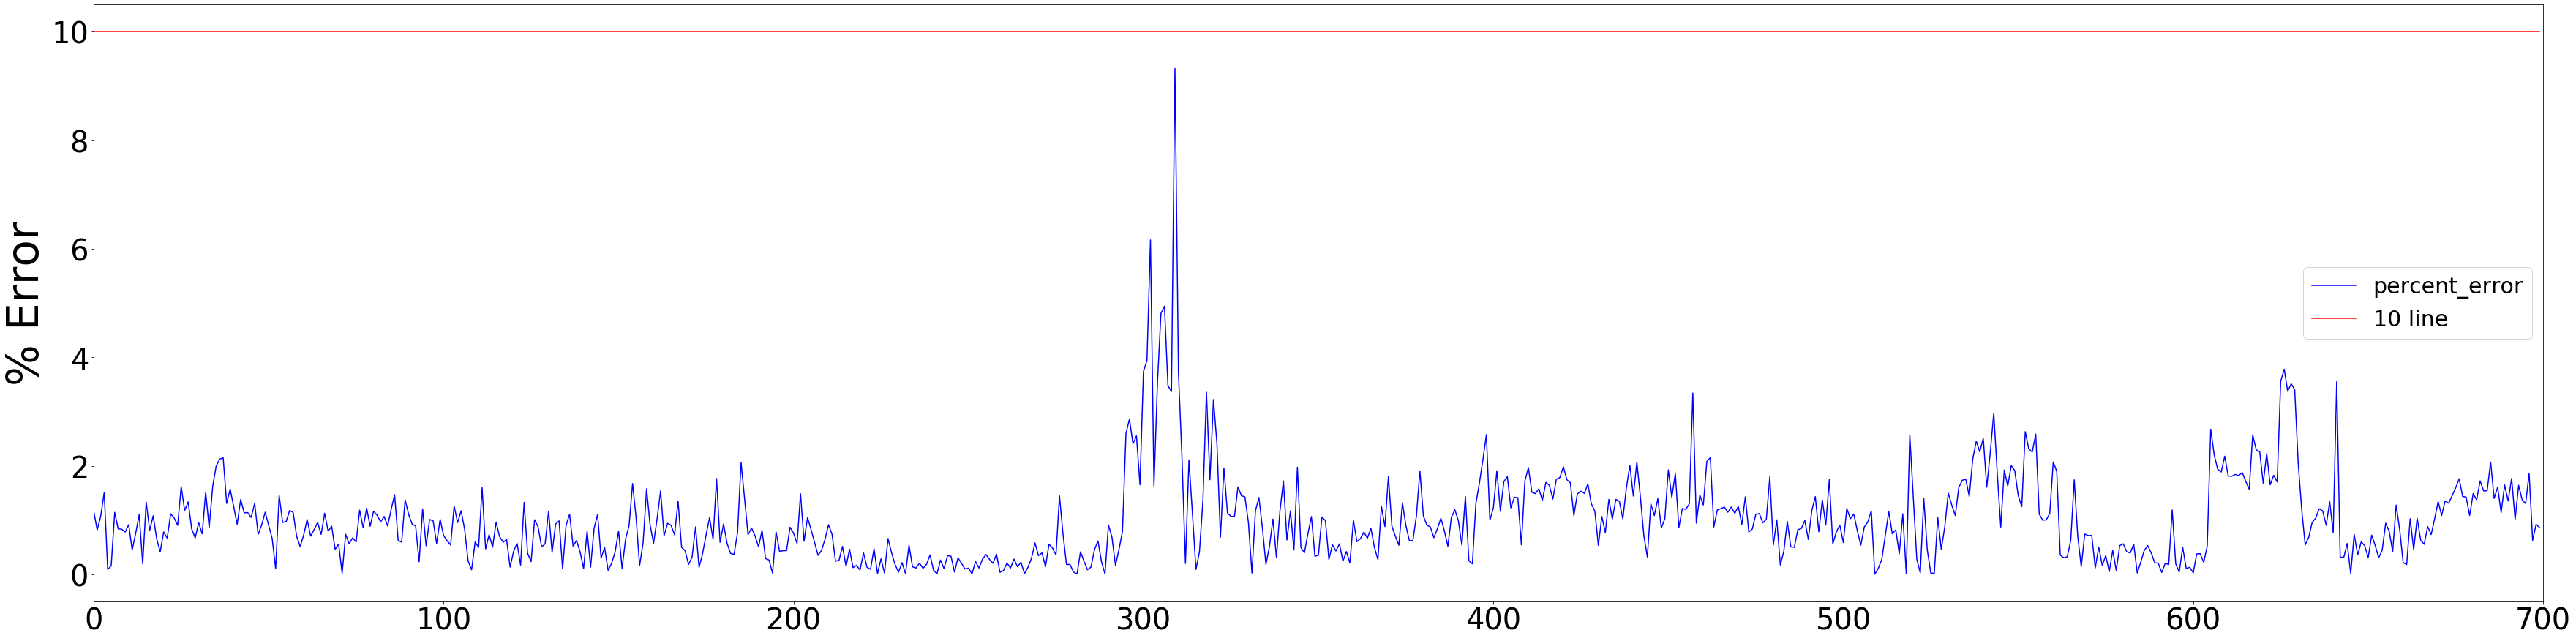

In [138]:
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res4['percent_error'],label='percent_error',color='blue')
plt.plot([10 for i in range(len(res4['percent_error']))],label='10 line',color='red')
plt.ylabel("% Error")
plt.xlim(xmin=0,xmax=len(res2['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

In [139]:
res4['percent_error'].max()

9.326779249429482

In [140]:
x_test = machine.x_test

In [141]:
df = machine.data.dataframe()
LEN = len(df)*3//4
x = df.drop("CLOSE",axis=1)
x = x.head(x.shape[0]-1)
LEN = len(df)*3//4
x_test = x.iloc[LEN:,:]

In [142]:
x_test = x_test.reset_index(drop=True)

In [143]:
res3 = pd.concat([x_test,res4],axis=1)
res3

,DATE,OPEN,HIGH,LOW,ADJ CLOSE,VOLUME,COMP_SOCIAL,NEG_SOCIAL,NEU_SOCIAL,POS_SOCIAL,...,BBANDSUPPER20,BBANDSLOWER20,WILLR14,MACD,MACDSIGNAL,MACDHIST,y_test,y_pred,abs_error,percent_error
0,1.544985e+09,2833.000000,2853.000000,2826.100098,2570.433838,225455.0,0.9477,0.008,0.930,0.062,...,2889.142369,2555.402626,-3.047015,47.866041,-7.63039,55.496431,2840.899902,2807.713379,33.186523,1.168169
1,1.545071e+09,2840.000000,2873.800049,2822.050049,2570.388428,443162.0,0.9804,0.020,0.870,0.111,...,2903.978358,2556.691637,-5.755956,49.440365,-6.93537,56.375735,2863.000000,2839.551514,23.448486,0.819018
2,1.545158e+09,2853.899902,2882.000000,2845.050049,2590.384033,393269.0,0.9913,0.015,0.840,0.145,...,2920.695204,2559.624791,-0.000000,51.873356,-6.54235,58.415706,2887.199951,2856.196533,31.003418,1.073823
3,1.545244e+09,2855.000000,2900.000000,2832.000000,2612.279785,288162.0,0.9871,0.000,0.878,0.122,...,2934.394251,2574.180749,-0.000000,55.118878,-5.05817,60.177048,2808.449951,2766.061768,42.388183,1.509309
4,1.545331e+09,2897.000000,2905.000000,2801.000000,2541.028564,386367.0,0.9819,0.032,0.854,0.114,...,2929.196549,2601.188436,-46.570117,50.751478,-2.79168,53.543158,2724.649902,2722.098877,2.551025,0.093628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.633891e+09,3845.000000,3879.899902,3830.350098,3852.100098,239321.0,0.7980,0.058,0.861,0.081,...,3923.493625,3716.471390,-39.231875,13.858262,32.12872,-18.270458,3978.750000,3926.779541,51.970459,1.306201
696,1.633977e+09,3860.000000,3994.500000,3858.000000,3978.750000,1353877.0,0.9996,0.031,0.845,0.124,...,3951.680421,3711.054589,-0.000000,24.829836,30.74265,-5.912814,3967.649902,3893.724609,73.925293,1.863201
697,1.634063e+09,3994.949951,4050.000000,3956.600098,3967.649902,648769.0,0.9963,0.017,0.903,0.080,...,3972.840161,3708.749829,-5.318687,32.257359,29.36098,2.896379,3965.899902,3941.003906,24.895996,0.627751
698,1.634150e+09,3970.000000,4009.050049,3954.199951,3965.899902,272066.0,-0.2023,0.059,0.881,0.060,...,3990.996883,3705.833097,-6.157212,37.569437,27.65828,9.911157,3915.949951,3879.783203,36.166748,0.923575


In [144]:
res3.columns = [g.lower() for g in res3.columns]

In [145]:
res3.to_json("results\\BAJAJAUTO\\output.json",orient='records')

In [146]:
drop = ['comp_social','neg_social', 'neu_social', 'pos_social', 'comp_news', 'pos_news',
       'neu_news', 'neg_news', 'rsi3', 'rsi6', 'rsi14', 'rsi50', 'rsi100',
       'mom1', 'mom3', 'ema6', 'ema12', 'sma3', 'rocr3', 'rocr12', 'cci12',
       'cci20', 'bbandsmiddle20', 'bbandsupper20', 'bbandslower20', 'willr14',
       'macd', 'macdsignal', 'macdhist']
res3 = res3.drop([x for x in res3.columns if x in drop],axis=1)
res3


,date,open,high,low,adj close,volume,y_test,y_pred,abs_error,percent_error
0,1.544985e+09,2833.000000,2853.000000,2826.100098,2570.433838,225455.0,2840.899902,2807.713379,33.186523,1.168169
1,1.545071e+09,2840.000000,2873.800049,2822.050049,2570.388428,443162.0,2863.000000,2839.551514,23.448486,0.819018
2,1.545158e+09,2853.899902,2882.000000,2845.050049,2590.384033,393269.0,2887.199951,2856.196533,31.003418,1.073823
3,1.545244e+09,2855.000000,2900.000000,2832.000000,2612.279785,288162.0,2808.449951,2766.061768,42.388183,1.509309
4,1.545331e+09,2897.000000,2905.000000,2801.000000,2541.028564,386367.0,2724.649902,2722.098877,2.551025,0.093628
...,...,...,...,...,...,...,...,...,...,...
695,1.633891e+09,3845.000000,3879.899902,3830.350098,3852.100098,239321.0,3978.750000,3926.779541,51.970459,1.306201
696,1.633977e+09,3860.000000,3994.500000,3858.000000,3978.750000,1353877.0,3967.649902,3893.724609,73.925293,1.863201
697,1.634063e+09,3994.949951,4050.000000,3956.600098,3967.649902,648769.0,3965.899902,3941.003906,24.895996,0.627751
698,1.634150e+09,3970.000000,4009.050049,3954.199951,3965.899902,272066.0,3915.949951,3879.783203,36.166748,0.923575


In [147]:
import datetime
datetime.datetime.fromtimestamp(res3.iloc[[699]]['date'])

datetime.datetime(2021, 10, 18, 0, 0)